In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../dataset/StudentsPerformance.csv")

# Preview data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.shape          # rows & columns
df.columns        # column names
df.info()         # data types
df.describe()     # statistics
df.isnull().sum() # missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:


df["total_score"] = (
    df["math score"] +
    df["reading score"] +
    df["writing score"]
)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [9]:
df["performance"] = pd.cut(
    df["total_score"],
    bins=[0, 150, 225, 300],
    labels=["At Risk", "Average", "High Performer"]
)


In [10]:
df[["total_score", "performance"]].head()


,total_score,performance
0,218,Average
1,247,High Performer
2,278,High Performer
3,148,At Risk
4,229,High Performer


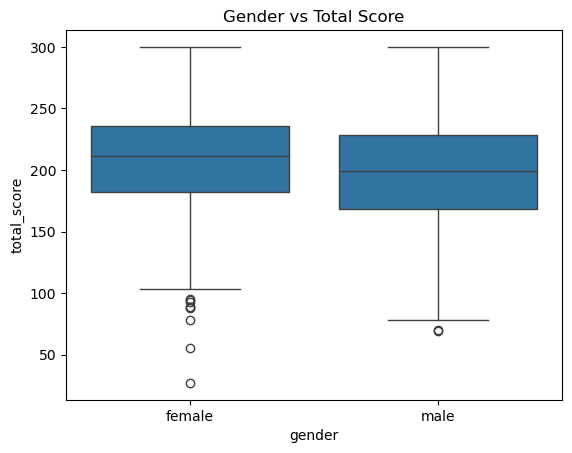

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="gender", y="total_score", data=df)
plt.title("Gender vs Total Score")
plt.show()


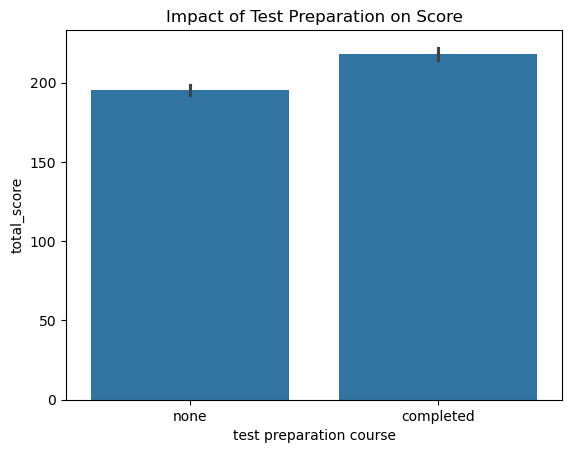

In [12]:
sns.barplot(
    x="test preparation course",
    y="total_score",
    data=df
)
plt.title("Impact of Test Preparation on Score")
plt.show()


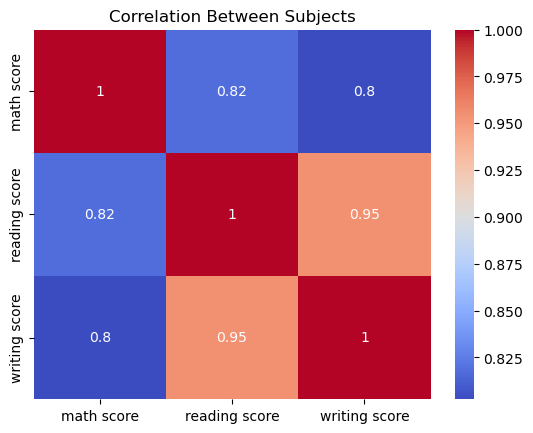

In [13]:
sns.heatmap(
    df[["math score","reading score","writing score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Subjects")
plt.show()


In [14]:
df.to_csv("../dataset/processed_student_data.csv", index=False)


In [21]:
df.to_csv("step1.csv", index=False)


In [20]:
import os
os.listdir()



['.ipynb_checkpoints',
 'processed_student_data_clean.csv',
 'student_analysis.ipynb',
 'student_performance_powerbi_ready.csv']